In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 200)

In [31]:
df= pd.read_csv(r'C:\Users\user\Downloads\data_to_be_cleaned.csv',)
df.head()

,date,sales
0,2024-01-01,0.000000
1,2024-01-02,0.011865
2,2024-01-03,0.070769
3,2024-01-04,0.769379
4,2024-01-05,1.475500


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    50 non-null     object 
 1   sales   41 non-null     float64
dtypes: float64(1), object(1)
memory usage: 932.0+ bytes


In [27]:
#converting int date time 
df['date']= pd.to_datetime(df['date'], format= "%Y-%m-%d")
df['date'].dtype

dtype('<M8[ns]')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    50 non-null     datetime64[ns]
 1   sales   41 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 932.0 bytes


Lets try to plot out the data just to see it 

In [42]:
na_dates = df[df['sales'].isna()]['date'].values
na_dates 

array(['2024-01-16', '2024-01-25', '2024-01-29', '2024-02-05',
       '2024-02-06', '2024-02-07', '2024-02-08', '2024-02-09',
       '2024-02-10'], dtype=object)

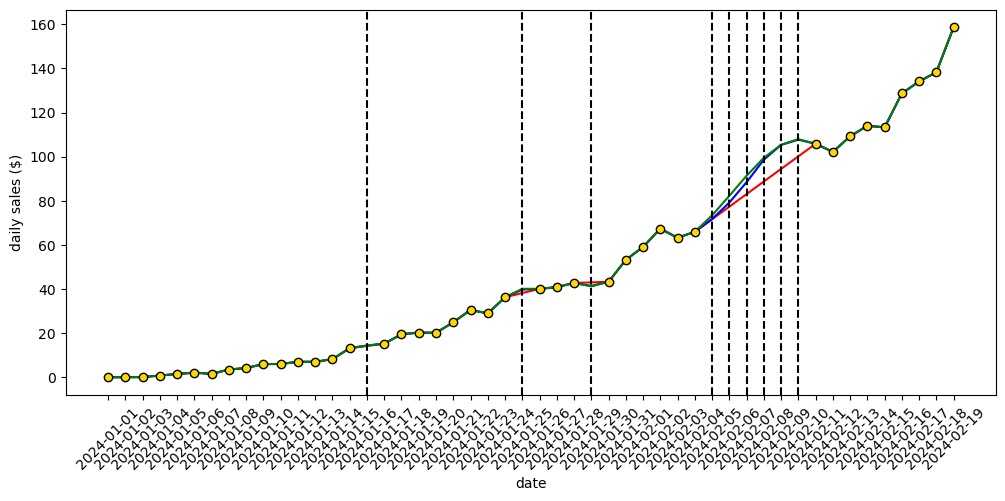

In [58]:
plt.figure(figsize= (12,5))

plt.plot(df['date'], df['linear_inter'], "-", label = 'linear', color ='red')
plt.plot(df['date'], df['quadratic_inter'], "-", label = 'quadratic', color ='blue')
plt.plot(df['date'], df['cubic_spline_inter'], "-", label = 'cubicspline', color ='green')

plt.plot(df['date'], df['sales'], 'o', label= 'sales', color ='gold', markeredgecolor= 'black', markeredgewidth= 1)

for date_values in na_dates:
    plt.axvline(date_values, linestyle= 'dashed', color= 'black')

plt.xticks(rotation = 45)
plt.xlabel('date')
plt.ylabel('daily sales ($)')


plt.show()

In [56]:
#linear interpolation for the missing vales 
df['linear_inter'] = df['sales'].interpolate(method = 'linear')
df['quadratic_inter'] = df['sales'].interpolate(method = 'quadratic')
df['cubic_spline_inter'] = df['sales'].interpolate(method = 'cubicspline')
df

,date,sales,linear_inter,quadratic_inter,cubic_spline_inter
0,2024-01-01,0.000000,0.000000,0.000000,0.000000
1,2024-01-02,0.011865,0.011865,0.011865,0.011865
2,2024-01-03,0.070769,0.070769,0.070769,0.070769
3,2024-01-04,0.769379,0.769379,0.769379,0.769379
4,2024-01-05,1.475500,1.475500,1.475500,1.475500
5,2024-01-06,2.082050,2.082050,2.082050,2.082050
6,2024-01-07,1.530587,1.530587,1.530587,1.530587
7,2024-01-08,3.475500,3.475500,3.475500,3.475500
8,2024-01-09,4.171263,4.171263,4.171263,4.171263
9,2024-01-10,5.957488,5.957488,5.957488,5.957488


THE ERROR ESTIMATION 


In [75]:
error_df = df[['date','sales']].copy()

#lets create a dummy data
error_df['dummy_sales'] = error_df['sales']

#lets purposely exclude some of the data
error_df.loc[(error_df.index + 1) % 5 == 0, 'dummy_sales'] = np.nan

error_df

,date,sales,dummy_sales
0,2024-01-01,0.000000,0.000000
1,2024-01-02,0.011865,0.011865
2,2024-01-03,0.070769,0.070769
3,2024-01-04,0.769379,0.769379
4,2024-01-05,1.475500,NaN
5,2024-01-06,2.082050,2.082050
6,2024-01-07,1.530587,1.530587
7,2024-01-08,3.475500,3.475500
8,2024-01-09,4.171263,4.171263
9,2024-01-10,5.957488,NaN


In [79]:
#lets run the different interpolation on the dummy data
error_df.loc[:,'linear_inter'] = error_df['dummy_sales'].interpolate(method = 'linear')
error_df.loc[:,'quadratic_inter'] = error_df['dummy_sales'].interpolate(method = 'quadratic')
error_df.loc[:,'cubic_spline_inter'] = error_df['dummy_sales'].interpolate(method = 'cubicspline')

error_df

,date,sales,dummy_sales,linear_inter,quadratic_inter,cubic_spline_inter
0,2024-01-01,0.000000,0.000000,0.000000,0.000000,0.000000
1,2024-01-02,0.011865,0.011865,0.011865,0.011865,0.011865
2,2024-01-03,0.070769,0.070769,0.070769,0.070769,0.070769
3,2024-01-04,0.769379,0.769379,0.769379,0.769379,0.769379
4,2024-01-05,1.475500,NaN,1.425714,1.762473,1.845916
5,2024-01-06,2.082050,2.082050,2.082050,2.082050,2.082050
6,2024-01-07,1.530587,1.530587,1.530587,1.530587,1.530587
7,2024-01-08,3.475500,3.475500,3.475500,3.475500,3.475500
8,2024-01-09,4.171263,4.171263,4.171263,4.171263,4.171263
9,2024-01-10,5.957488,NaN,5.085632,4.935806,4.853978


In [81]:
#look at the errors 
error_df['linear_error'] = np.abs(error_df['linear_inter']- error_df['sales'])
error_df['quadratic_error'] = np.abs(error_df['quadratic_inter']- error_df['sales'])
error_df['cubic_spline_error'] = np.abs(error_df['cubic_spline_inter']- error_df['sales'])

error_df

,date,sales,dummy_sales,linear_inter,quadratic_inter,cubic_spline_inter,linear_error,quadratic_error,cubic_spline_error
0,2024-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2024-01-02,0.011865,0.011865,0.011865,0.011865,0.011865,0.000000,0.000000,0.000000
2,2024-01-03,0.070769,0.070769,0.070769,0.070769,0.070769,0.000000,0.000000,0.000000
3,2024-01-04,0.769379,0.769379,0.769379,0.769379,0.769379,0.000000,0.000000,0.000000
4,2024-01-05,1.475500,NaN,1.425714,1.762473,1.845916,0.049785,0.286973,0.370416
5,2024-01-06,2.082050,2.082050,2.082050,2.082050,2.082050,0.000000,0.000000,0.000000
6,2024-01-07,1.530587,1.530587,1.530587,1.530587,1.530587,0.000000,0.000000,0.000000
7,2024-01-08,3.475500,3.475500,3.475500,3.475500,3.475500,0.000000,0.000000,0.000000
8,2024-01-09,4.171263,4.171263,4.171263,4.171263,4.171263,0.000000,0.000000,0.000000
9,2024-01-10,5.957488,NaN,5.085632,4.935806,4.853978,0.871857,1.021682,1.103510


In [83]:
#there are too many zeros in our data lets try and separate them in that
error_df[(~ error_df['sales'].isna()) & (error_df['dummy_sales'].isna())]

,date,sales,dummy_sales,linear_inter,quadratic_inter,cubic_spline_inter,linear_error,quadratic_error,cubic_spline_error
4,2024-01-05,1.475500,NaN,1.425714,1.762473,1.845916,0.049785,0.286973,0.370416
9,2024-01-10,5.957488,NaN,5.085632,4.935806,4.853978,0.871857,1.021682,1.103510
14,2024-01-15,13.181920,NaN,10.536103,9.804657,9.697469,2.645817,3.377263,3.484451
19,2024-01-20,20.127841,NaN,22.578585,21.299064,20.953923,2.450744,1.171223,0.826083
29,2024-01-30,43.255063,NaN,49.694437,48.862642,49.118363,6.439374,5.607579,5.863300
34,2024-02-04,65.923902,NaN,68.529907,61.028254,61.451140,2.606004,4.895648,4.472762
44,2024-02-14,114.003405,NaN,111.223272,109.714538,109.709602,2.780133,4.288867,4.293803
49,2024-02-19,158.662692,NaN,138.270681,NaN,160.223107,20.392011,NaN,1.560416


In [85]:
actual_error_df = error_df[(~ error_df['sales'].isna()) & (error_df['dummy_sales'].isna())].copy()

actual_error_df[['linear_error','quadratic_error','cubic_spline_error']].mean()

linear_error          4.779466
quadratic_error       2.949891
cubic_spline_error    2.746843
dtype: float64

In [87]:
actual_error_df[['linear_error','quadratic_error','cubic_spline_error']].std()

linear_error          6.577481
quadratic_error       2.113353
cubic_spline_error    2.037966
dtype: float64

As we can see the cubic spline interpolation is the better one to use when not given enough data about our missing values
